## Terrabrasilis Analytics API 🌳 ##

Source: https://github.com/terrabrasilis/terrabrasilisAnalyticsAPI

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


In [4]:
%%R

devtools::install_github("terrabrasilis/terrabrasilisAnalyticsAPI") # github group name is terrabrasilis
library(terrabrasilisAnalyticsAPI) # R package name is terrabrasilisAnalyticsAPI

Skipping install of 'terrabrasilisAnalyticsAPI' from a github remote, the SHA1 (8cb7d816) has not changed since last install.
  Use `force = TRUE` to force installation


In [5]:
%%R

apiPath <- "http://terrabrasilis.dpi.inpe.br/dashboard/api/v1/redis-cli/"

In [6]:
%%R
appIdentifier <- list_datasets(apiPath)


In [7]:
%%R
prodesAmazonia <- appIdentifier[2]

In [8]:
%%R
prodesAmazonia

[1] "prodes_amazon"


In [9]:
%%R
periods <- list_periods(apiPath, prodesAmazonia)

In [10]:
%%R
periods

# A tibble: 17 × 6
   startDate.year startDate.month startDate.day endDate.year endDate.month
            <int>           <int>         <int>        <int>         <int>
 1           1500               8            10         2007             7
 2           2007               8             1         2008             7
 3           2008               8             1         2009             7
 4           2009               8             1         2010             7
 5           2010               8             1         2011             7
 6           2011               8             1         2012             7
 7           2012               8             1         2013             7
 8           2013               8             1         2014             7
 9           2014               8             1         2015             7
10           2015               8             1         2016             7
11           2016               8             1         2017             7
12    

In [11]:
%%R
classes <- list_classes(apiPath, prodesAmazonia)

In [12]:
%%R
classes

# A tibble: 1 × 3
     id name          description                                               
  <int> <chr>         <chr>                                                     
1     1 deforestation It is the process of complete and permanent disappearance…


In [13]:
%%R
locals <- list_locals(apiPath, prodesAmazonia)

In [14]:
%%R
locals

# A tibble: 4 × 2
    gid name    
  <int> <chr>   
1     1 uf      
2     2 mun     
3     3 consunit
4     4 indi    


In [15]:
%%R
localOfInterest <- list_local_of_interests(apiPath, prodesAmazonia)

In [16]:
%%R
localOfInterest[402:412,]

# A tibble: 11 × 4
     gid loiname                        codibge   loi
   <int> <chr>                            <int> <dbl>
 1   657 Urucu/Juruá                         NA     4
 2   658 Apiaka/Kayabi                       NA     4
 3   659 Arara da Volta Grande do Xingu      NA     4
 4   660 Katukina/Kaxinawá                   NA     4
 5   661 Miratu                              NA     4
 6   662 Lago do Correio                     NA     4
 7   663 Jaquiri                             NA     4
 8   664 Paumari do Rio Ituxi                NA     4
 9   665 Taihantesu                          NA     4
10   666 Apiaká do Pontal e Isolados         NA     4
11   667 Governador                          NA     4


In [17]:
%%R
loiUF = dplyr::filter(locals, grepl("uf", name))$gid

loinamesByLoi <- list_localOfInterestByLocal(apiPath, prodesAmazonia, loiUF)

In [18]:
%%R
loinamesByLoi

# A tibble: 9 × 2
    gid loiname    
  <int> <chr>      
1     1 Acre       
2     2 Rondônia   
3     3 Amazonas   
4     4 Pará       
5     5 Roraima    
6     6 Tocantins  
7     7 Mato Grosso
8     8 Maranhão   
9     9 Amapá      


In [19]:
%%R
filters <- list_filters(apiPath, prodesAmazonia)

In [20]:
%%R
filters

# A tibble: 1 × 2
     id type            
  <int> <chr>           
1     1 fid_area >= 0.01


In [21]:
%%R
data <- get_dataByLocalOfInterest(apiPath, 
                                  prodesAmazonia, 
                                  classes$name, 
                                  loinamesByLoi[3,]$gid)


New names:
• `loi` -> `loi...1`
• `loiname` -> `loiname...2`
• `areas` -> `areas...3`
• `loi` -> `loi...4`
• `loiname` -> `loiname...5`
• `areas` -> `areas...6`
• `loi` -> `loi...7`
• `loiname` -> `loiname...8`
• `areas` -> `areas...9`
• `loi` -> `loi...10`
• `loiname` -> `loiname...11`
• `areas` -> `areas...12`
• `loi` -> `loi...13`
• `loiname` -> `loiname...14`
• `areas` -> `areas...15`
• `loi` -> `loi...16`
• `loiname` -> `loiname...17`
• `areas` -> `areas...18`
• `loi` -> `loi...19`
• `loiname` -> `loiname...20`
• `areas` -> `areas...21`
• `loi` -> `loi...22`
• `loiname` -> `loiname...23`
• `areas` -> `areas...24`
• `loi` -> `loi...25`
• `loiname` -> `loiname...26`
• `areas` -> `areas...27`
• `loi` -> `loi...28`
• `loiname` -> `loiname...29`
• `areas` -> `areas...30`
• `loi` -> `loi...31`
• `loiname` -> `loiname...32`
• `areas` -> `areas...33`
• `loi` -> `loi...34`
• `loiname` -> `loiname...35`
• `areas` -> `areas...36`
• `loi` -> `loi...37`
• `loiname` -> `loiname...38`
• `areas` 

In addition: Warning message:
`cols` is now required when using `unnest()`.
ℹ Please use `cols = c(areas)`. 


In [22]:
%%R
data

            name         clazz startDate.year startDate.month startDate.day
1  PRODES AMAZON deforestation           1500               8            10
2  PRODES AMAZON deforestation           2007               8             1
3  PRODES AMAZON deforestation           2008               8             1
4  PRODES AMAZON deforestation           2009               8             1
5  PRODES AMAZON deforestation           2010               8             1
6  PRODES AMAZON deforestation           2011               8             1
7  PRODES AMAZON deforestation           2012               8             1
8  PRODES AMAZON deforestation           2013               8             1
9  PRODES AMAZON deforestation           2014               8             1
10 PRODES AMAZON deforestation           2015               8             1
11 PRODES AMAZON deforestation           2016               8             1
12 PRODES AMAZON deforestation           2017               8             1
13 PRODES AM

In [23]:
%%R
data <- get_dataByParameters(apiPath, 
                            prodesAmazonia, 
                            classes$name, 
                            loinamesByLoi[1,]$gid, 
                            "2019-01-01", 
                            "2023-12-30")

New names:
• `loi` -> `loi...1`
• `loiname` -> `loiname...2`
• `areas` -> `areas...3`
• `loi` -> `loi...4`
• `loiname` -> `loiname...5`
• `areas` -> `areas...6`
• `loi` -> `loi...7`
• `loiname` -> `loiname...8`
• `areas` -> `areas...9`
• `loi` -> `loi...10`
• `loiname` -> `loiname...11`
• `areas` -> `areas...12`


In addition: Warning message:
`cols` is now required when using `unnest()`.
ℹ Please use `cols = c(areas)`. 


In [24]:
%%R
data

           name         clazz startDate.year startDate.month startDate.day
1 PRODES AMAZON deforestation           2019               8             1
2 PRODES AMAZON deforestation           2020               8             1
3 PRODES AMAZON deforestation           2021               8             1
4 PRODES AMAZON deforestation           2022               8             1
  endDate.year endDate.month endDate.day loi loiname type      area
1         2020             7          31   1       1    1  660.7160
2         2021             7          31   1       1    1  892.0548
3         2022             7          31   1       1    1 1005.8640
4         2023             7          31   1       1    1  456.3407


In [25]:
%%R
data <- get_dataByParameters(apiPath, prodesAmazonia, classes$name, loinamesByLoi[1,]$gid, "2019-01-01", "2023-12-30") %>% 
  dplyr::filter(.,endDate.year!=2000) %>% 
  dplyr::select(name, clazz, startDate.year, endDate.year, area)

data

New names:
• `loi` -> `loi...1`
• `loiname` -> `loiname...2`
• `areas` -> `areas...3`
• `loi` -> `loi...4`
• `loiname` -> `loiname...5`
• `areas` -> `areas...6`
• `loi` -> `loi...7`
• `loiname` -> `loiname...8`
• `areas` -> `areas...9`
• `loi` -> `loi...10`
• `loiname` -> `loiname...11`
• `areas` -> `areas...12`
           name         clazz startDate.year endDate.year      area
1 PRODES AMAZON deforestation           2019         2020  660.7160
2 PRODES AMAZON deforestation           2020         2021  892.0548
3 PRODES AMAZON deforestation           2021         2022 1005.8640
4 PRODES AMAZON deforestation           2022         2023  456.3407


In addition: Warning message:
`cols` is now required when using `unnest()`.
ℹ Please use `cols = c(areas)`. 


In [26]:

%%R
data <- get_dataByParameters(apiPath, 
                            prodesAmazonia, 
                            classes$name, 
                            loinamesByLoi[1,]$gid, 
                            "2019-01-01", 
                            "2023-12-30") %>%
as_tibble()

New names:
• `loi` -> `loi...1`
• `loiname` -> `loiname...2`
• `areas` -> `areas...3`
• `loi` -> `loi...4`
• `loiname` -> `loiname...5`
• `areas` -> `areas...6`
• `loi` -> `loi...7`
• `loiname` -> `loiname...8`
• `areas` -> `areas...9`
• `loi` -> `loi...10`
• `loiname` -> `loiname...11`
• `areas` -> `areas...12`


In addition: Warning message:
`cols` is now required when using `unnest()`.
ℹ Please use `cols = c(areas)`. 


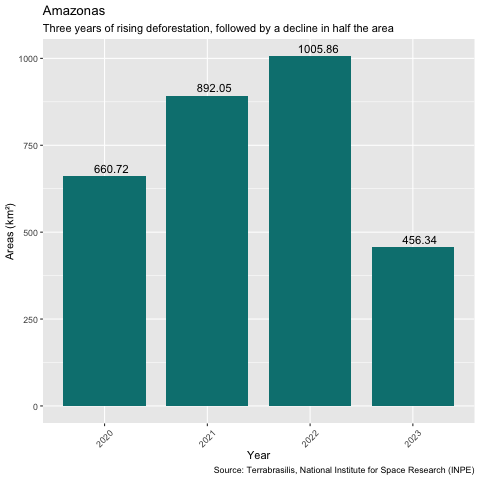

In [27]:
%%R
library(ggplot2) 

ggplot(data, aes(x=as.factor(endDate.year), y=area, fill=clazz)) + 
  geom_text(aes(label=as.numeric(round(area, 2))), vjust=-0.5, hjust=0.3, size = 4) +
  geom_bar(stat = "identity", width = 0.8, fill = "#008080") +
  scale_x_discrete("Year", labels = as.character(data$endDate.year), breaks = data$endDate.year) +
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5)) +
  labs(colour = "Date") + labs(x = "Years") + labs(y = "Areas (km²)") + 
  labs(title = loinamesByLoi[3,]$loiname, subtitle = "Three years of rising deforestation, followed by a decline in half the area",  caption = "Source: Terrabrasilis, National Institute for Space Research (INPE)" ) + labs(fill = "class")


In [28]:
plt.savefig('chart.png')

<Figure size 1600x10000 with 0 Axes>